---
##4.&nbsp; Challenge: apply this to the spotify dataset 😃
Now that you have learned how to estimate the optimal number of clusters, it's time to apply this knowledge to the Spotify data. Determine the number of clusters that you think is correct, apply it to the data, and evaluate the resulting clusters.

To evaluate the clusters, consider the business context. We want the clusters to be coherent playlists that customers will be happy with. For example, would most customers be happy with a couple of death metal tracks interrupting their classical playlist? Or would customers be happy with "Clair de lune" in the middle of a high-energy workout playlist? Listen to the tracks, look at the names, and get a feel for what's happening.

Also, feel free to be creative in how you think you can decide whether the tracks in each cluster go together or not.

# Importing Librarys

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import Data

In [2]:
url = '/Users/sadiakhanrupa/Bootcamp Main Phase/Chapter 6 Unsupervised ML/data/6.3.3_spotify_5000_songs.csv'
songs_df = pd.read_csv(url)
songs_df.tail()

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...
5234,5234,"Ravel: Boléro, M. 81 ...",Maurice Ravel,0.3540,0.04870,5,-24.568,1,0.0323,0.783,0.484,0.2840,0.2530,64.120,,948787,3,7E1ErYYCn0lYjHODZ1qGuB,https://open.spotify.com/track/7E1ErYYCn0lYjHO...


# Clean The Data

In [3]:
songs_df.columns

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [4]:
songs_df.columns = songs_df.columns.str.replace(' ', '')


In [5]:
songs_df_cl = songs_df.drop(columns=['Unnamed:0', 'type', 'id', 'html'])
songs_df_cl

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4


# set index

In [6]:
#we want to set song name and artist as our index
songs_df_cl = songs_df_cl.set_index(['artist', 'name'])
songs_df_cl

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,name,,,,,,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
Antônio Carlos Jobim,Saudade De Bahia,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
Martinho Da Vila,"Canta Canta, Minha Gente",0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
Chico César,Mulher Eu Sei,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Kurt Elling,Rosa Morena,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


# Scale the data

In [7]:
scaler = MinMaxScaler().set_output(transform='pandas')
songs_df_cl_mm = scaler.fit_transform(songs_df_cl)


In [8]:
songs_df_cl_mm

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,name,,,,,,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Antônio Carlos Jobim,Saudade De Bahia,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
Martinho Da Vila,"Canta Canta, Minha Gente",0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
Chico César,Mulher Eu Sei,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
Kurt Elling,Rosa Morena,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6




># Estimate the number of clusters (k) 🔢

Inertia and the elbow method

In clustering, inertia is a measure of how well data points fit into their assigned clusters. Lower inertia indicates a better fit. However, minimising inertia alone can lead to meaningless clusters, with each data point in its own cluster.

The elbow method is a visual aid for identifying the optimal number of clusters. It plots inertia values for different cluster numbers, revealing an "elbow" where the inertia reduction begins to plateau. This plateau indicates that reducing inertia further has little impact on cluster quality.

To find the inertia score for our clusters, we can use the [KMeans attribute ](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)`.inertia_`.

We will cluster our  song playlists multiple times, starting with 1 cluster and increasing the number of clusters by 1 each time until we reach `max_k`. We will store the inertia score for each clustering in a list.

Once we've calculated the inertia scores for all values of k, we'll plot them on a line chart. We'll then look for the "elbow" in the line chart. The elbow is the point where the inertia score starts to plateau, indicating that adding more clusters is not significantly improving the quality of the clustering.

In [56]:
seed = 42

max_k = 50

inertia_list = []

for i in range (1, max_k):
    myKMeans = KMeans(n_clusters=i,
                      n_init='auto',
                      random_state=seed)
    
    myKMeans.fit(songs_df_cl_mm)
    inertia_list.append(myKMeans.inertia_)

inertia_list


[4619.353396478227,
 3641.9206367350025,
 2645.047196867492,
 2437.0548872017475,
 2021.3646278618153,
 1827.5068641114922,
 1647.4937172381046,
 1507.5907379156506,
 1418.1562436982153,
 1328.8889560471628,
 1280.8699334390712,
 1240.3645757462273,
 1159.3760692670207,
 1131.897934673824,
 1098.538193366835,
 1081.0074863213501,
 1068.8134140337984,
 1022.3479567554996,
 1014.4713483831624,
 973.6657689922124,
 946.6817421804872,
 930.0853384436341,
 902.9753065440436,
 892.0763950350395,
 874.6210619812127,
 861.0738827557453,
 851.5099122780083,
 837.324208561662,
 832.4818829855622,
 824.5495452955788,
 814.8722518708655,
 813.2509398079264,
 805.0025819147229,
 800.2833429875911,
 792.534770971639,
 786.7815347406479,
 773.8915047949796,
 769.064371802616,
 762.3484088654043,
 756.3395468085631,
 739.3730104612365,
 732.4275091245936,
 726.3623678222611,
 719.7286996862354,
 719.5039718300676,
 711.0176113114591,
 707.2031057030733,
 703.8422522006388,
 699.1839683096549]

/Users/sadiakhanrupa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


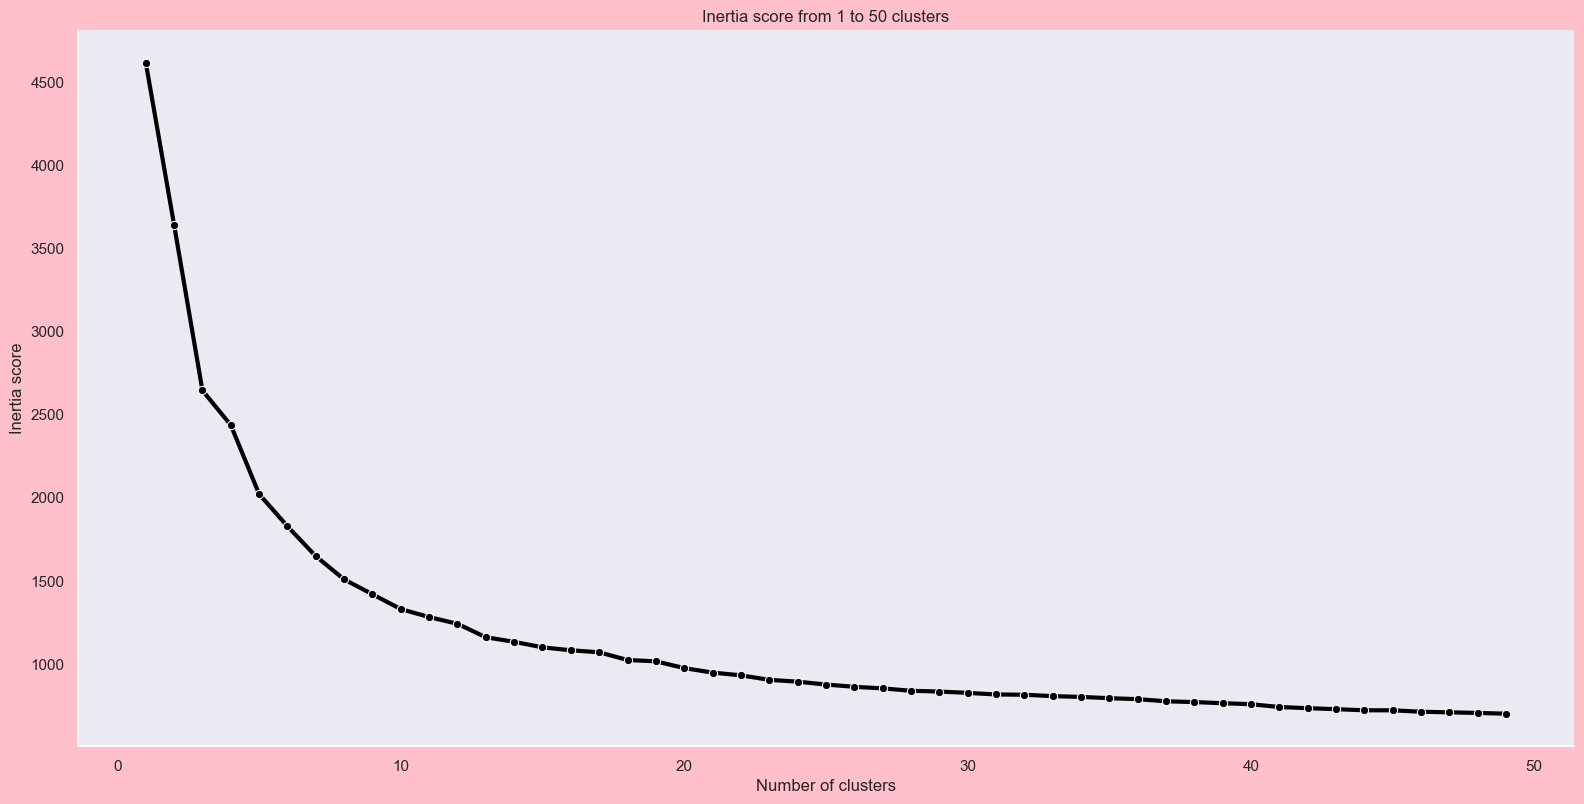

In [58]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')
import matplotlib.pyplot as plt
plot = (
# Create a line plot of the inertia scores
 sns.relplot(y = inertia_list,
            x = range(1,max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);
plt.grid(False)

for line in plot.ax.lines:
    line.set_linewidth(3)  # Increase line width
    line.set_color('black')  # Set line color to black

# Set background color
plt.gcf().set_facecolor('pink')



plt.show()  # Display the plot

Where the elbow lies is not always clear - it's up to you to decide, you're the data scientist. If there are multiple points where you believe the elbow could be, use your knowledge of the business case to inform your decision. How many data points do you have? How many would be in a cluster if you chose this number of clusters? What is the point of making these clusters? Is there a logical number of clusters, where if you make more clusters they just become too small for your business case?
> The elbow method is a heuristic, meaning that it is not guaranteed to find the optimal number of clusters in all cases.

###3.2.&nbsp; The silhouette score
The silhouette score is another metric for evaluating the quality of clustering results. It measures how well each data point is assigned to its cluster, taking into account the distance to other clusters. The silhouette score ranges from -1 to 1, with higher scores indicating better clustering.

The silhouette score can be used to identify the optimal number of clusters by clustering the data with different numbers of clusters and selecting the number of clusters that has the highest the silhouette score.

To calculate the silhouette score we'll use the [SKLearn function ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)`silhouette_score`.

In [21]:
# Set the maximum number of clusters to try
max_k = 50

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(20, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters=j,
                    n_init="auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(songs_df_cl_mm)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(songs_df_cl_mm, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)
sil_scores

[0.22416380634228786,
 0.21934953335203786,
 0.21347332693566826,
 0.20586383755941612,
 0.20632008389152132,
 0.20597546359461122,
 0.20127266044216327,
 0.19486378920210495,
 0.19298570075764296,
 0.18807488166752026,
 0.18685302778881513,
 0.18651598898514793,
 0.18567799372150187,
 0.182397512456213,
 0.17735609352321885,
 0.17753133596583126,
 0.17724841924553322,
 0.17924313385077661,
 0.17330502573468035,
 0.171064564012485,
 0.17237388245074256,
 0.1731633844785164,
 0.1735354664592953,
 0.17125152820609738,
 0.17125687792109673,
 0.16740192440664634,
 0.16821521280758936,
 0.16512425534965483,
 0.16092653210487315,
 0.15840217203298138]

/Users/sadiakhanrupa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


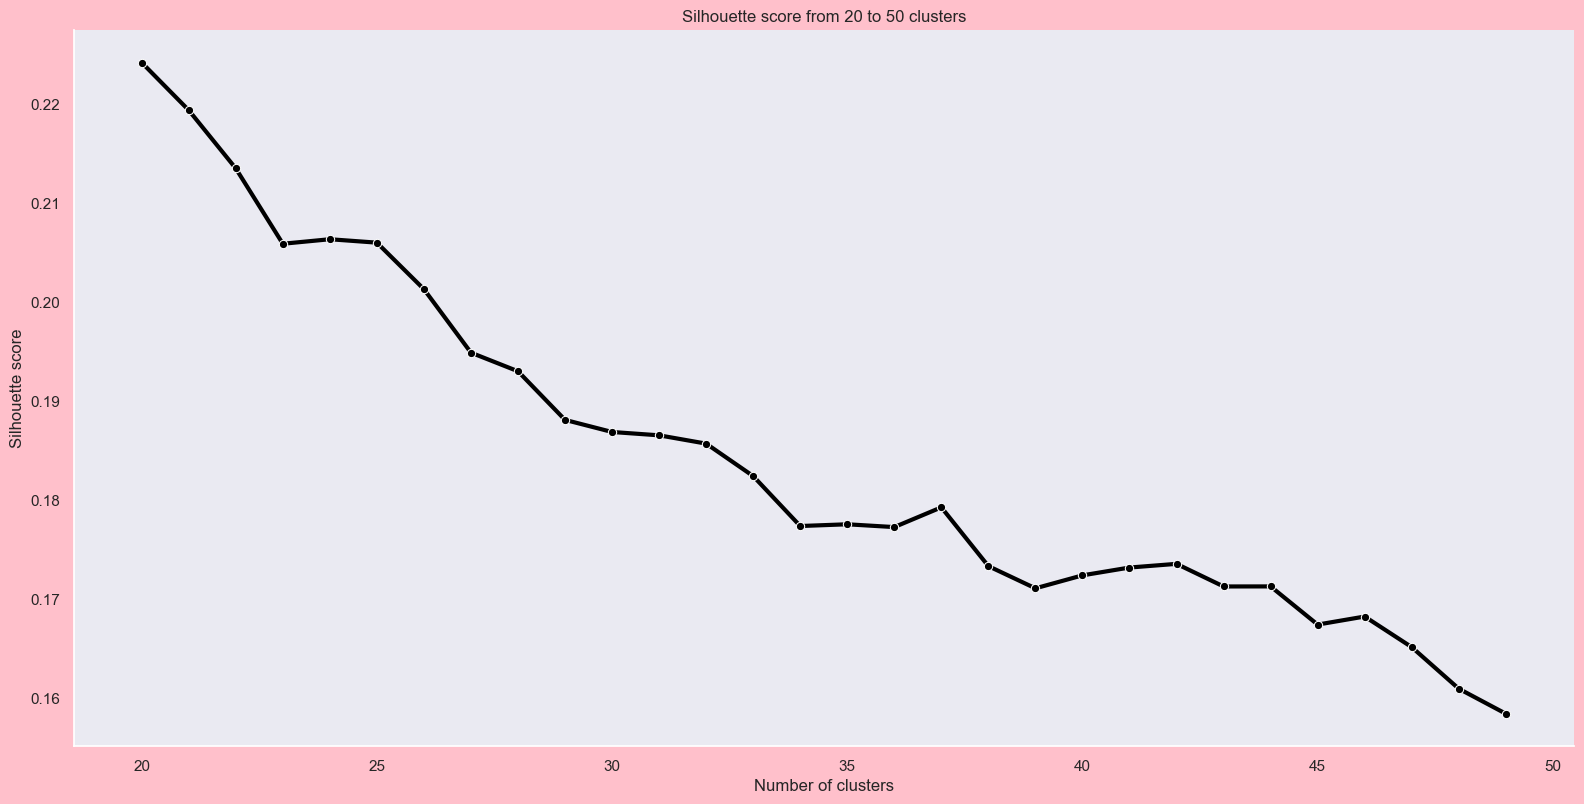

In [54]:
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')

plot =(
sns.relplot(y=sil_scores,
            x=range(20,max_k),
            kind='line',
            marker='o',
            height = 8,
            aspect=2)
.set(title=f"Silhouette score from 20 to {max_k} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

plt.grid(False)

for line in plot.ax.lines:
    line.set_linewidth(3)  # Increase line width
    line.set_color('black')  # Set line color to black

# Set background color
plt.gcf().set_facecolor('pink')



plt.show()  # Display the plot